# ПРОЕКТ "ИССЛЕДОВАНИЕ РЫНКА НЕДВИЖИМОСТИ"



В данном проекте мы рассмотрим архив сервиса Яндекс.Недвижимость о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.

Наше исследование будет состоять из следующих этапов:

[1. Просмотр данных. Общая информация по таблице](#1)

[2. Заполнение пропусков, изменение типа данных](#2)

[3. Расчет дополнительных параметров](#3)

[4. Исследовательский анализ данных](#4)

[5. Зависимость ценообразования от различных параметров](#5)

[6. Анализ ценообразования в городах с наибольшим числом объявлений](#6)

[7. Анализ цен на недвижимость в Санкт-Петербурге](#7)

[8. Общие выводы по проекту](#8)

Результатом проекта станет набор параметров, которые будет рекомендовано учесть при построении автоматизированной системы определения рыночной стоимости объекта недвижимости.



### 1. Просмотр данных. Общая информация по таблице
<a id="1"></a>

Для начала импортируем все необходимые библиотеки и прочем файл с данными.

In [718]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [719]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Сразу становятся очевидными следующие проблемы с данными:
1. Высокий процент пропусков, больше половины столбцов имеют незаполненные ячейки
2. Наибольшее число пропусков допущено в столбцах, которые должны заполняться автоматически (типа расстояния до ближайшего парка или пруда), что может говорить о несовершенстве системы определения локации объекта недвижимости.
3. Типы данных большинтва столбцов потрбуют изменений

### Вывод:

Автоматическая система заполнения некоторых параметров дает большие сбои при определении расстояния до объектов инфраструктуры. Это может негативно повлиять на общий "имидж" объекта недвижимости, т.к. для многих потенциальных арендаторов может быть важным параметром близкое расположение парков или близость к аэропорту. Пропуски подобных значений не позволяют клиентам сервиса по достоинству оценить многие квартиры.

Пропуски в данных, предоставленных арендодателем так же встречаются и будут заполнены подходящими по смыслу значениями.
Фоматы данных так же потребуют изменений для точности дальнейших расчетов.

### 2. Заполнение пропусков, изменение типа данных.
<a id="2"></a>

In [720]:
data.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

В некоторых столбцах незаполнено больше половины значений. Чаще всего проблемы встречаются в столбцах с автоматическим заполнением и в этом случае пропуски в таких столбцах, как `parks_around3000`,`parks_nearest`,`ponds_around3000`, `ponds_nearest` нам придется расценить как остутствие объектов инфраструкторы на указазнном расстоянии от квартир.

Так же поступим и со столбцом `is_apartment`, пропуски в котором больше похожи на некорректно заполненную анкету. 
Возможно стоит проработать формулировки опросника, чтобы арендодатели при любом варианте ответа остатвляли отметку в этом пункте (Как вариант, добавить четкие ответы: "Да" / "Нет").

Наличие балкона, пропущенное в столбце `balcony` можно расценить, как остутствие такового в квартире. Поскольку балкон часто рассматривается арендадторами, как преимущество, и при описании квартиры владельцы обычно делают акцент на его наличии. 

Пропуски в столбце `days_exposition` логично было бы объяснить тем, что объявления по-прежнему выставлены на портале.

Остальные пропуски будем заполнять логичными значениями для каждого отдельного случая.



##### Высота потолка
Вы берем способ замены пропусков в столбце `ceiling_height`.
Рассчитаем среднее и медианное значение:

In [721]:
data['ceiling_height'].median()


2.65

In [722]:
data['ceiling_height'].mean()

2.77149889685604

In [723]:
data['ceiling_height'].value_counts()

2.50      3515
2.60      1646
2.70      1574
3.00      1112
2.80       993
          ... 
27.50        1
5.00         1
3.59         1
4.80         1
100.00       1
Name: ceiling_height, Length: 183, dtype: int64

В значениях столбца есть такие артефакты, как 100м., поэтому для замены будет предпочтительна медиана:

In [724]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [725]:
data['ceiling_height'].isna().sum()

0

Замена прошла успешно, пропусков в данном столбце больше нет.

##### Количество этажей в доме

Т.к. пропусков очень мало (0,3%), но они помешают нам в дальнейших расчетах, заполним пропуски так, чтобы эти квартиры в дальнейшем по распределению относительно этажа (первый, последний, другие) попали в самую многочисленную категорию "другие".
Для этого присвоим им общее количество на 2 этажа больше, чем этаж, на котором располагается квартира:

In [726]:
data['floors_total'] = data['floors_total'].fillna(data['floor']+2)


In [727]:
data['floors_total'].isna().sum()

0

Замена произведена, пропуски устранены.

##### Жилая площадь

Пропуски в столбце `living_area` будет логично заполнить средним значением. Но, чтобы правильно его оценить, стоит для начала выяснить, какое значение в принципе по нашей стране считается нормальным. Обратимся к открытым источникам.
Например, в <a href="https://metrprice.ru/analitika-rynka/obsaa-i-zilaa-plosad-v-kvartire-kakim-dolzen-byt-balans" > статье в специализированного журнала </a> по вопросам недвижимости говорится, что так называемый "планировочный коэффициент К1" (отношение жилой площади к общей площади помещения) обычно находится в рекомендованном промежутке от 0,5 до 0,7. В комфортабельных квартирах он ближе к нижней границе, в более экономичных – к верхней.

Учитывая большой разброс значений площадей квартир, использовать для вычисления коэффициента просто средние значения столбцов `total_area`и `living_area` будет не совсем корректно. Поэтому рассчитаем коэффициент для каждого объекта и затем возьмем его медианное значение.

In [728]:
data['living_koef'] = data['living_area'] / data['total_area']

In [729]:
koef_living_area = data['living_koef'].median()
koef_living_area

0.5678598992678503

Итак, медианное значение коэффициента около 56%. Соответственно для заполнения пропусков в столбце жилой площади умножим построчно общую площадь квартир на полученный планировочный коэффициент.

In [730]:
data['living_area'] = data['living_area'].fillna(data['total_area']*0.56)

In [731]:
data['living_area'].isna().sum()

0

##### Является ли квартира апартаментами

В данном случае логичнее будет считать, что люди просто не поставили галочку в данном пункте опросника, подразумевая, что квартира не является апартаментами. Поэтому все пропуски заполним значением False

In [732]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [733]:
data['is_apartment'] = data['is_apartment'].fillna('False')

In [734]:
data['is_apartment'].isna().sum()

0

##### Число комнат

В столбце `rooms` пропусков нет, но есть нулевые значения. Логчиным объяснением этого артефакта можно считать варианты квартир с планировкой по типу "студии" . Такие квартиры можно смело назвать однокомнатными и присвоить пропускам значение "1"


In [735]:
data['rooms'] = data['rooms'].replace(0,1)

In [736]:
data['rooms'].value_counts()

1     8244
2     7940
3     5814
4     1180
5      326
6      105
7       59
8       12
9        8
10       3
14       2
11       2
15       1
12       1
19       1
16       1
Name: rooms, dtype: int64

Теперь в каждой квратире есть хотя бы одна комната :)

##### Площадь кухни

Поскольку площадь кухни будет занимать разный процент общей площади в зависимости от количества комнат, то заполним пропуски медианными значениями для каждой группы квартир по числу комнат.


In [737]:
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby('rooms')['kitchen_area'].transform('median'))

#####  Наличие балкона

Как мы уже отмечали выше, любой арендодатель не упустит шанса подчеркнуть наличие балкона, как дополнительного преимущества в квартире. Поэтому отсутствие значения в столбце `balcony` можно вполне счесть за отсутствие балкона в принципе.


In [738]:
data['balcony'] = data['balcony'].fillna(0)

##### Наличие аэропорта 

Оценим общее число пропущенных значений:

In [739]:
data['airports_nearest'].isna().sum()

5542


Попробуем заполнить пропуски по расстоянию до аэропорта медианным значением для каждого населенного пункта.

In [740]:
data['airports_nearest'] = data['airports_nearest'].fillna(data.groupby('locality_name')['airports_nearest'].transform('median'))

Проверим результат заполнения:

In [741]:
data['airports_nearest'].isna().sum()

5394

In [742]:
data.groupby('locality_name')['airports_nearest'].agg('median')

locality_name
Бокситогорск           NaN
Волосово               NaN
Волхов                 NaN
Всеволожск             NaN
Выборг                 NaN
                        ..
село Путилово          NaN
село Рождествено       NaN
село Русско-Высоцкое   NaN
село Старая Ладога     NaN
село Шум               NaN
Name: airports_nearest, Length: 364, dtype: float64

Таким образом заполнилась лишь небольшая часть пропусков, у остальных населенных пунктов по всей таблице не проставлены расстояния до аэропорта. 
Это очень похоже на ошибку автоматического определения расстояния, т.к. в Выборге аэропорт совсем недалеко.
Надо обозначить проблему разработчикам, а в наших расчетах придется заменить данные артефактом, который мы в дальнейшем сможем отсечь.

In [743]:
data['airports_nearest'] = data['airports_nearest'].fillna(99999)

In [744]:
data['airports_nearest'].isna().sum()

0

##### Расстояния до парков и прудов

В столбцах с автоматическим определением расстояния до парков и прудов самое большое количество пропусков.
Проставим в пустые ячейки артефактное "99999", обозначив их отсутствие вблизи квартиры.

In [745]:
data['parks_around3000'] = data['parks_around3000'].fillna(99999)

In [746]:
data['parks_nearest'] = data['parks_nearest'].fillna(99999)

In [747]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(99999)

In [748]:
data['ponds_nearest'] = data['ponds_nearest'].fillna(99999)

##### Расстояние до центра города

По аналогии с аэропортом попробуем заполнить пропуски расстояния до центра по медианному значению для каждого населенного пункта:

In [749]:
data['cityCenters_nearest'].isna().sum()

5519

In [750]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data.groupby('locality_name')['cityCenters_nearest'].transform('median'))

In [751]:
data['cityCenters_nearest'].isna().sum()

5394

In [752]:
data[data['cityCenters_nearest'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_koef
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.400,5,False,...,0.0,городской посёлок Янино-1,99999.0,NaN,99999.0,99999.0,99999.0,99999.0,55.0,0.473684
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.430,26,False,...,0.0,посёлок Мурино,99999.0,NaN,99999.0,99999.0,99999.0,99999.0,189.0,0.465320
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.65,5.0,30.000,5,False,...,0.0,Сертолово,99999.0,NaN,99999.0,99999.0,99999.0,99999.0,90.0,0.555556
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.000,15,False,...,2.0,деревня Кудрово,99999.0,NaN,99999.0,99999.0,99999.0,99999.0,60.0,0.517241
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.65,9.0,18.368,2,False,...,0.0,Коммунар,99999.0,NaN,99999.0,99999.0,99999.0,99999.0,63.0,NaN
37,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.50,5.0,25.648,1,False,...,0.0,поселок городского типа Красный Бор,99999.0,NaN,99999.0,99999.0,99999.0,99999.0,196.0,NaN
38,10,3150000.0,40.00,2018-03-29T00:00:00,1,2.75,18.0,16.300,9,False,...,0.0,посёлок Мурино,99999.0,NaN,99999.0,99999.0,99999.0,99999.0,103.0,0.407500
47,17,3600000.0,56.10,2018-10-18T00:00:00,3,2.65,4.0,42.500,3,False,...,1.0,Гатчина,99999.0,NaN,99999.0,99999.0,99999.0,99999.0,179.0,0.757576
60,3,2740000.0,35.00,2018-01-01T00:00:00,1,2.65,12.0,19.600,8,False,...,0.0,посёлок Мурино,99999.0,NaN,99999.0,99999.0,99999.0,99999.0,11.0,NaN
62,0,4800000.0,78.60,2017-09-17T00:00:00,3,2.80,9.0,48.800,5,False,...,2.0,Сертолово,99999.0,NaN,99999.0,99999.0,99999.0,99999.0,5.0,0.620865


Мы заполнили пропуски там, где это было возможно. 
Просмотрев примеры оставшихся пропусков, мы видим, что находятся они зачастую в поселках, селах и небольших городах. В таком случае расстояние до центра настолько малО, что автоматически не регистрируется.
Проставим в оставшихся пропусках 0, т.к. на дальнейших расчетах это никак не отразится.

In [753]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0)

##### Название населенного пункта

Незначительные пропуски остались только в графах с незаполненным названием населенного пункта.
Поскольку количество этих пропусков очень мало (2%), можем удалить эти строки из данных, что никак не скажется на наших расчетах.

In [754]:
data = data.dropna(subset=['locality_name'])

In [755]:
data['locality_name'].isna().sum()

0

##### Время продажи квартиры

Пропуски значений со временем продажи квартиры будем считать, что они до сих пор не проданы и еще актуальны.
Заменим их на артефакты, чтобы они не мешали нам сменить тип данных.

In [756]:
data['days_exposition'] = data['days_exposition'].fillna(99999)

In [757]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null float64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null object
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null float64
locality_name           23650 non-null object
airports_nearest        23650 non-null float64
cityCenters_nearest     23650 non-null float64
parks_around3000        23650 non-null float64
parks_nearest           23650 non-null float64
ponds_around3

Пропуски остались только в планировочном коэффициенте, они будут заполнены в следующих разделах проекта.

А пока заменим тип данных на целочисленный с помощью цикла.
Дробные значения оставим в столбцах с высотой потолков и планировочным коэффициентом.

In [758]:
lst = ['last_price','total_area', 'floors_total','living_area', 'kitchen_area', 'balcony', 'airports_nearest', 
'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']
for col in lst:
    data[col] = data[col].astype(int)


Столбцу с датой и временем так же меняем формат:


In [759]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%d %H:%M:%S')

In [760]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23650 non-null int64
last_price              23650 non-null int64
total_area              23650 non-null int64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null int64
living_area             23650 non-null int64
floor                   23650 non-null int64
is_apartment            23650 non-null object
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null int64
balcony                 23650 non-null int64
locality_name           23650 non-null object
airports_nearest        23650 non-null int64
cityCenters_nearest     23650 non-null int64
parks_around3000        23650 non-null int64
parks_nearest           23650 non-null int64
ponds_around3000        2

#### Вывод:  
Во втором разделе проекта были произведены замены пропущенных значений во всех столбцах таблицы.
Пропуски в названиях населенных пунктов пришлось удалить, т.к. расположение квартиры является важным фактором формирования ее стоимости. К тому же пропуски составляли очень малую часть данных (2%).

Огромное число пропусков (до 60%) зафиксировано в столбцах, значения которых должны определяться автоматически. Необходимо сообщить разработчикам сервиса, что система не до конца отлажена, что приводит к потере ценной информации для арендаторов.

Некоторое число пропусков, возможно. связано с погрешностями составления опросника для арендодателя, либо с переносом данных из анкет в электронную базу. Этот момент так же необходимо проработать (улучшить формулировки анкеты, провести работу с сотрудниками, заполняющими базу).

###  3.  Расчет дополнительных параметров
<a id="3"></a>

##### 3.1 
Важным параметром оценки недвижимости является стоимость квадратного метра.
Добавим в таблицу столбец с этой информацией.

In [761]:
data['sq_m_price'] = data['last_price'] / data['total_area']

In [762]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_koef,sq_m_price
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,False,...,Санкт-Петербург,18863,16028,1,482,2,755,99999,0.472222,120370.370370
1,7,3350000,40,2018-12-04,1,2.65,11,18,1,False,...,посёлок Шушары,12817,18603,0,99999,0,99999,81,0.460396,83750.000000
2,10,5196000,56,2015-08-20,2,2.65,5,34,4,False,...,Санкт-Петербург,21741,13933,1,90,2,574,558,0.612500,92785.714286
3,0,64900000,159,2015-07-24,3,2.65,14,89,9,False,...,Санкт-Петербург,28098,6800,2,84,3,234,424,NaN,408176.100629
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,False,...,Санкт-Петербург,31856,8098,2,112,1,48,121,0.320000,100000.000000


In [763]:
data['sq_m_price'].describe().astype(int)
                                    

count      23650
mean       99884
std        50449
min          111
25%        77000
50%        95454
75%       114895
max      1907500
Name: sq_m_price, dtype: int64

Разброс данных довольно велик, максимальное и минимальное значение различаются в десятки раз.
Построим диаграмму разброса, чтобы исключить выбросы.

(0, 1000000)

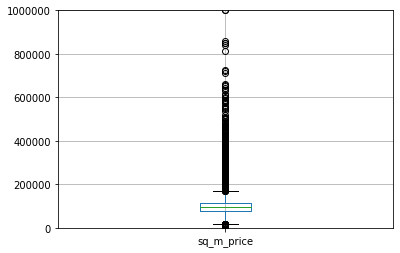

In [764]:
data.boxplot('sq_m_price')
plt.ylim(0,1000000)

Очень много выбросов, как в сторону завышенных значений, так и в меньшую сторону.
Ориентируясь на диаграмму размаха, исключим из датафрейма строки, в которых стоимость кв.м. меньше 20.000 и больше 200.000 руб.


In [765]:
data = data.drop(data.query('sq_m_price > 200000 or sq_m_price < 20000').index)
len(data)

22975

Удалив выбросы по цене за кв.м., мы убрали меньше 3% данных, что является вполне приемлимым и не окажет влияния на дальнейшие исследования. 

Text(0, 0.5, 'Частота')

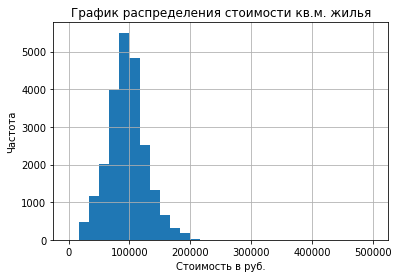

In [766]:
ax = (data['sq_m_price']
      .plot(kind='hist',grid=True, title ='График распределения стоимости кв.м. жилья', range=(0,500000), bins=30))
ax.set_xlabel('Стоимость в руб.')  
ax.set_ylabel('Частота')

Теперь данные выглядят гораздо однороднее, гистограмма указывает на нормальное распределение, среднее арифметическое и медиана практически равны.
По отфильтрованным данным можно сделать вывод, что средняя цена квадратного метра в целом по Спб и области составляет 95.000 за м2, а 75% квартир имеют стоимость м2 не выше 113.000 руб.

##### 3.2
Следующим шагом категоризируем данные о расположении квартиры в доме по этажам, присвоив всем квартирам значения: "первый", "последний" либо "другой".

In [767]:
def get_floor_category(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif  floor == floors_total:
        return 'последний'
    else:
        return 'другой'
data['floor_category'] = data.apply(get_floor_category, axis = 1)  

In [768]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_koef,sq_m_price,floor_category
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,False,...,18863,16028,1,482,2,755,99999,0.472222,120370.370370,другой
1,7,3350000,40,2018-12-04,1,2.65,11,18,1,False,...,12817,18603,0,99999,0,99999,81,0.460396,83750.000000,первый
2,10,5196000,56,2015-08-20,2,2.65,5,34,4,False,...,21741,13933,1,90,2,574,558,0.612500,92785.714286,другой
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,False,...,31856,8098,2,112,1,48,121,0.320000,100000.000000,другой
5,10,2890000,30,2018-09-10,1,2.65,12,14,5,False,...,99999,0,99999,99999,99999,99999,55,0.473684,96333.333333,другой


In [769]:
data['floor_category'].value_counts()

другой       16941
последний     3196
первый        2838
Name: floor_category, dtype: int64

Text(0, 0.5, 'Частота')

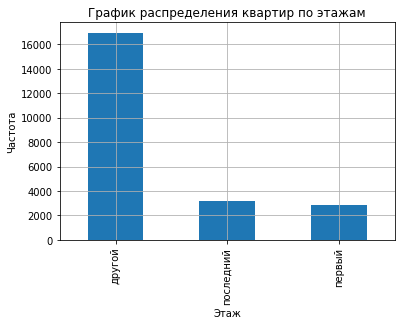

In [770]:
ax = data['floor_category'].value_counts().plot(kind='bar', grid=True)
ax.set_title('График распределения квартир по этажам')
ax.set_xlabel('Этаж')
ax.set_ylabel('Частота')

Сразу можно увидеть, что "другие" этажи вполне логично составляют бОльшую часть, а количество квартир на первом и последнем этажах примерно равны.

##### 3.3
Дозаполним наш столбец с планировочным коэффициентом `living_koef` теперь, когда мы устранили пропуски в столбцах с площадью:

In [771]:
data['living_koef'] = data['living_area'] / data['total_area']

In [772]:
data['living_koef'].isna().sum()

0

In [773]:
data['living_koef'].describe()

count    22975.000000
mean         0.561858
std          0.101329
min          0.038462
25%          0.500000
50%          0.559211
75%          0.629032
max          1.000000
Name: living_koef, dtype: float64

Text(0.5, 0, 'Доля жилой площади')

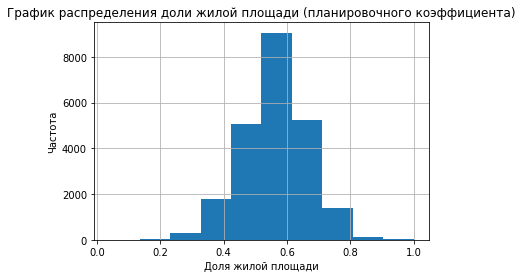

In [774]:
ax = data['living_koef'].plot(kind='hist', bins=10, grid=True)
ax.set_title('График распределения доли жилой площади (планировочного коэффициента)')
ax.set_ylabel('Частота')
ax.set_xlabel('Доля жилой площади')


В подавляющем большинстве случаев жилая площадь занимает чуть больше половины квартиры.
Среднее арифметическое и медиана практически равны, что подтверждает равномерность данных и ничтожную долю выбросов.

##### 3.4
Теперь посмотрим, как соотносится площадь кухни к жилой площади:

In [775]:
data['kitchen_koef'] = data['kitchen_area'] / data['total_area']

In [776]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_koef,sq_m_price,floor_category,kitchen_koef
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,False,...,16028,1,482,2,755,99999,0.472222,120370.370370,другой,0.231481
1,7,3350000,40,2018-12-04,1,2.65,11,18,1,False,...,18603,0,99999,0,99999,81,0.450000,83750.000000,первый,0.275000
2,10,5196000,56,2015-08-20,2,2.65,5,34,4,False,...,13933,1,90,2,574,558,0.607143,92785.714286,другой,0.142857
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,False,...,8098,2,112,1,48,121,0.320000,100000.000000,другой,0.410000
5,10,2890000,30,2018-09-10,1,2.65,12,14,5,False,...,0,99999,99999,99999,99999,55,0.466667,96333.333333,другой,0.300000


In [777]:
data['kitchen_koef'].describe()

count    22975.000000
mean         0.185644
std          0.074925
min          0.018219
25%          0.130435
50%          0.166667
75%          0.230769
max          0.787879
Name: kitchen_koef, dtype: float64

Text(0.5, 0, 'Доля площади кухни')

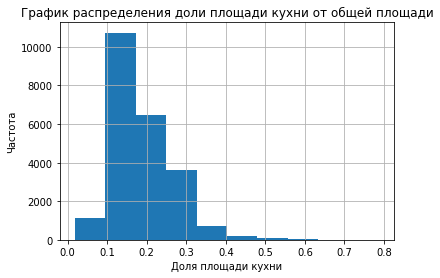

In [778]:
ax = data['kitchen_koef'].plot(kind='hist', grid=True, bins=10,title='График распределения доли площади кухни от общей площади')
ax.set_ylabel('Частота')
ax.set_xlabel('Доля площади кухни')

Даже с учетом разной площади квартир, соотношение площади кухни и общей площади не имеет очевидных выбросов, величина стандартного отклонения очень мала.

##### 3.5
Следующим шагом получим максимум информации из столбца `first_day_exposition`
Вычислим из этой даты дни недели, месяцы  и года.

In [779]:
data['weekday'] = data['first_day_exposition'].dt.weekday

In [780]:
data['month'] = data['first_day_exposition'].values.astype('datetime64[M]')

In [781]:
data['year'] = data['first_day_exposition'].dt.year

In [782]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,living_koef,sq_m_price,floor_category,kitchen_koef,weekday,month,year
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,False,...,2,755,99999,0.472222,120370.370370,другой,0.231481,3,2019-03-01,2019
1,7,3350000,40,2018-12-04,1,2.65,11,18,1,False,...,0,99999,81,0.450000,83750.000000,первый,0.275000,1,2018-12-01,2018
2,10,5196000,56,2015-08-20,2,2.65,5,34,4,False,...,2,574,558,0.607143,92785.714286,другой,0.142857,3,2015-08-01,2015
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,False,...,1,48,121,0.320000,100000.000000,другой,0.410000,1,2018-06-01,2018
5,10,2890000,30,2018-09-10,1,2.65,12,14,5,False,...,99999,99999,55,0.466667,96333.333333,другой,0.300000,0,2018-09-01,2018


In [783]:
data.groupby('year')['total_area'].count()


year
2014     126
2015    1126
2016    2666
2017    7970
2018    8299
2019    2788
Name: total_area, dtype: int64

Text(0, 0.5, 'Количество объявлений')

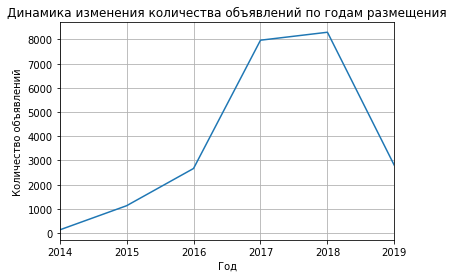

In [784]:
ax = data.groupby('year')['total_area'].count().plot(grid=True)
ax.set_title('Динамика изменения количества объявлений по годам размещения')
plt.xlabel('Год', axes=ax)
plt.ylabel('Количество объявлений', axes=ax)

Можем сразу посмотреть, сколько объявлений размещается на сервисе Яндекс.Недвижимость ежегодно.
За первые три года виден активный рост популярности сервиса, число объявление возрастало в разы. 

В 2018 году портал еще немного улучшил показатели предыдущего года. Малое число объявлений за 2019г обусловлено тем, что статистика приведена за неполный период.
Проверим это предположение:

In [785]:
data['first_day_exposition'].max()

Timestamp('2019-05-03 00:00:00')

Так и есть, последнее объявление размещено в мае 2019, т.е. полной картины за год мы еще не имеем.
Но в среднем тенденция такова, что количество объявлений в 2019 году вряд ли превысит показатели прошлых лет, т.к. за 5 месяцев года набрана только треть объявлений от сумым за 2018г.

#### Вывод

В данном разделе мы 
- рассчитали необходимые дополнительные параметры, которые помогут определить факторы влияния на стоимость недвижимости;
- категоризировали разрозненные данные о расположении квартир по этажам;
- избавились от выбросов в цене за квадратный метр
- подготовили данные для подробного анализа взаимосвязей между параметрами и их влияния на стоимость квартиры.

### 4. Исследовательский анализ данных 
<a id="4"></a>

##### Площадь квартир

Text(0.5, 0, 'Площадь квартиры')

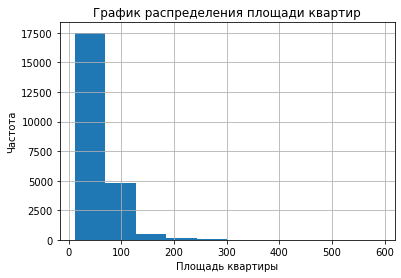

In [786]:
ax = data['total_area'].plot(kind='hist', bins=10,title='График распределения площади квартир' , grid=True)
ax.set_ylabel('Частота')
ax.set_xlabel('Площадь квартиры')

In [787]:
data['total_area'].describe()

count    22975.000000
mean        58.574929
std         31.772591
min         12.000000
25%         40.000000
50%         51.000000
75%         68.000000
max        590.000000
Name: total_area, dtype: float64

Величина стандартного отклонения довольно велика, а минимальное и максимальное значения отличаются в десятки раз.
Постоим диаграмма размаха, чтобы наглядно увидеть выбивающиеся значения:

(0, 400)

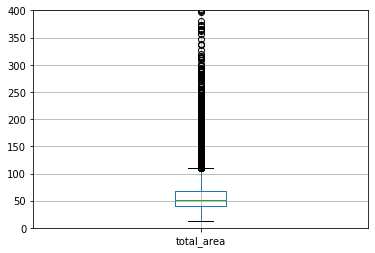

In [788]:
data.boxplot('total_area')
plt.ylim(0,400)


In [789]:
data.groupby('rooms')['total_area'].agg(['mean','count'])

,mean,count
rooms,,
1,37.097924,8139
2,55.156509,7712
3,76.199031,5572
4,102.986264,1092
5,152.010309,291
6,190.780220,91
7,239.980392,51
8,253.200000,10
9,292.285714,7


По диаграмме и группировке (относительно числа комнат) становится очевидно наличие выбросов по квартирам, площадью больше 115 кв.м. Этих квартир мало в численном эквиваленте, но их площади доходят до 590кв.м., что может сильно исказить общие сведения по нашей базе.
Избавимся от этих данных в нашем датафрейме:

In [790]:
data = data.drop(data.query('total_area > 115').index)
len(data)

22015

In [791]:
data['total_area'].describe()

count    22015.000000
mean        53.943584
std         19.314224
min         12.000000
25%         39.000000
50%         50.000000
75%         65.000000
max        115.000000
Name: total_area, dtype: float64

In [792]:
data['total_area'].median()

50.0

In [793]:
data.groupby('rooms')['total_area'].agg(['mean','count'])

,mean,count
rooms,,
1,36.989676,8136
2,54.970883,7693
3,73.147967,5312
4,84.765526,789
5,97.066667,75
6,100.777778,9
7,100.000000,1


Мы удалили ~3% данных, избавились от одиночных завышенных значений. Теперь медиана практически равна среднему арифметическому, что подтверждает однородность данных.

##### Итоговая стоимость квартиры

Изучим параметр итоговой стоимости квартир:

In [794]:
data.groupby('rooms')['last_price'].agg(['mean', 'count']).astype(int)

,mean,count
rooms,,
1,3746138,8136
2,5262321,7693
3,6748604,5312
4,7557786,789
5,8038133,75
6,11272777,9
7,13490000,1


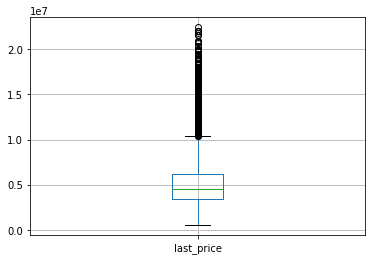

In [795]:
data.boxplot('last_price')

In [796]:
data.last_price.describe().astype(int)

count       22015
mean      5155171
std       2747991
min        550000
25%       3390000
50%       4500000
75%       6200000
max      22400000
Name: last_price, dtype: int64

Судя по диаграмме размаха и подсчету основных показателей, в этой графе выбросами являются квартиры стоимостью свыше 11 млн. рублей (есть даже стоимость в 22млн.) и от этих завышенных значений лучше избавиться:


In [797]:
data = data.drop(data.query('last_price > 11000000').index)
len(data)

21048

Text(0, 0.5, 'Частота')

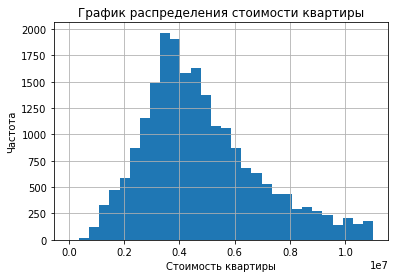

In [798]:
ax = (data['last_price']
      .plot(kind='hist',title='График распределения стоимости квартиры', range=(0,11000000),grid=True, bins=30))
plt.xlabel('Стоимость квартиры', axes=ax)
plt.ylabel('Частота', axes=ax)


In [799]:
data.groupby('rooms')['last_price'].agg(['mean', 'count']).astype(int)

,mean,count
rooms,,
1,3727584,8119
2,4985206,7436
3,5914694,4748
4,6586060,676
5,7274307,65
6,8141000,4


У нас получилась диаграмма нормального распределения c  пиком в райне 3,7млн - 4 млн рублей, т.к. почти половина всех квартир в базе - это однокомнатные и двухкомнатные квартиры со средними ценами 3.7 млн и 4.9млн соответственно


Итак, мы избавились от выбивающихся высоких значений стоимости квартир, получили средние стоимости квартир по количеству комнат и выяснили, что больше половины предложений в базе находятся в ценовом диапазоне от 3.5 до 5млн рублей.

##### Количество комнат

Рассмотрим теперь, какие по числу комнат квартиры чаще всего продают:

In [800]:
data['rooms'].value_counts()

1    8119
2    7436
3    4748
4     676
5      65
6       4
Name: rooms, dtype: int64

In [801]:
data['rooms'].describe()

count    21048.000000
mean         1.914101
std          0.873657
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

Text(0, 0.5, 'Частота')

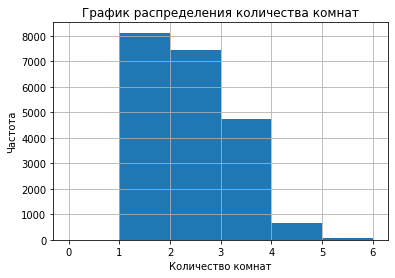

In [802]:
ax = data['rooms'].plot(kind='hist', grid=True, range=(0,6), bins=6)
ax.set_title('График распределения количества комнат')
plt.xlabel('Количество комнат', axes=ax)
plt.ylabel('Частота', axes=ax)

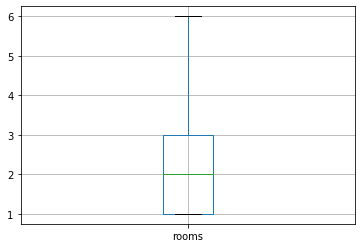

In [803]:
data.boxplot('rooms')

 В графе `rooms` у нас нет выбивающихся значений. Подавляющее большинство (не менее 75%) продаваемых квартир имеет не более трех комнат.

##### Высота потолка

Рассмотрим еще один параметр - высота потолков в помещениях:

In [804]:
data['ceiling_height'].describe()

count    21048.000000
mean         2.695694
std          0.792416
min          1.000000
25%          2.600000
50%          2.650000
75%          2.680000
max         32.000000
Name: ceiling_height, dtype: float64

In [805]:
data['ceiling_height'].value_counts()

2.65    8938
2.50    3445
2.60    1619
2.70    1459
2.55     967
        ... 
1.75       1
3.48       1
3.57       1
3.67       1
3.39       1
Name: ceiling_height, Length: 156, dtype: int64

(0, 6)

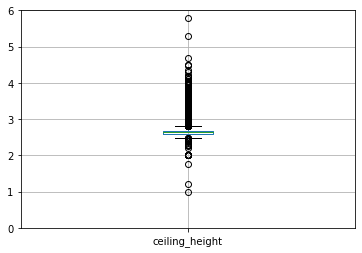

In [806]:
data.boxplot('ceiling_height')
plt.ylim(0,6)

По диаграмме разброса видно, что имеются сильные отклонения от нормального распределения как в большую, так и в меньшую сторону.
Конечно, на рынке жилья есть квартиры и эконом, и премиум класса, и высота потолков в этих сегментах может ощутимо различаться.
Ознакомившись со <a href="https://www.dp.ru/a/2016/10/27/Dostich_potolka#:~:text=%D0%92%D1%8B%D1%81%D0%BE%D1%82%D0%B0%20%D0%BF%D0%BE%D1%82%D0%BE%D0%BB%D0%BA%D0%BE%D0%B2%20%D0%BD%D0%B0%20%D1%80%D1%8B%D0%BD%D0%BA%D0%B5%20%D0%BD%D0%BE%D0%B2%D0%BE%D1%81%D1%82%D1%80%D0%BE%D0%B5%D0%BA,2%2C6%E2%80%933%20%D0%BC.">статьей</a>  о рынке недвижимости Санкт-Петербурга мы подтверждаем результаты диаграммы разброса: высота потолка менее 2.5 метров ограничена нормативами в сфере строительства, максимальная высота остается на усмотрение застройщика (чем выше класс жилья, тем выше могут быть потолки), в новостройках все чаще потолки могут достигать от 4 до 10 метров в высоту
В нашем датафрейме встречается как высота в 1 метр, так и высоты до 30 метров, что явно похоже на ошибку внесения данных и мы попробуем убрать экстремально низкие и высокие значения.

In [807]:
data = data.drop(data.query('ceiling_height > 10 or ceiling_height < 2.5').index)
len(data)

20952

##### Время продажи квартиры

In [808]:
data['days_exposition'].describe()

count    20952.000000
mean     12206.933324
std      32506.836275
min          1.000000
25%         45.000000
50%        115.000000
75%        348.000000
max      99999.000000
Name: days_exposition, dtype: float64

Отсутствующие значения в этом столбце мы сочли за активные /незакртые пока объявления. Поэтому отфильтруем артефакт "99999" и посчитаем среднее время продажи.

In [809]:
days_filt = data.query('days_exposition != 99999')['days_exposition']
len(days_filt)

18426

In [810]:
days_filt.describe()

count    18426.000000
mean       171.615815
std        209.436522
min          1.000000
25%         43.000000
50%         91.000000
75%        217.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [811]:
days_filt.median()

91.0

В среднем продажа занимает около трех месяцев. В данном случае нам лучше ориентироваться на значение медианы, так как среди значений есть и удивительно быстрые продажи за 1 день и объявления, которые до продажи были размещены на сервисе 1580 дней.
Поскольку 75% объявлений размещаются на сервисе не более чем на 217 дней, можно считать сроки свыше этого значения медленными продажами. Ориенируясь на первый квантиль, можно считать продажи ранее 43 дней дней размещения быстрыми.

### 5.Зависимость ценообразования от различных параметров
<a id="5"></a>

Изучим зависимость стоимость квартиры от ее площади:

In [812]:
data['total_area'].corr(data['last_price'])

0.6985488025476425

Положительный процент корреляции Пирсона говорит о том, что между площадью и ценой есть прямая связь. С увеличением площади квартиры неизбежно растет и ее цена.

In [813]:
data['rooms'].corr(data['last_price'])

0.44391529154142245

In [814]:
data.groupby('rooms')['last_price'].agg('mean').astype(int)

rooms
1    3729581
2    4992375
3    5920367
4    6593388
5    7274307
6    8141000
Name: last_price, dtype: int64

Между количеством комнат и ценой так же есть прямая корреляция, с увеличением числа комнат растет и цена (т.к. естественным образом растет и площадь квартиры)

Проверим зависимость стоимость квартиры от ее удаленности от центра населенного пункта.
Получим значения квартилей по этому столбцу для дальнейшей группировки. 

In [815]:
data['cityCenters_nearest'].describe()

count    20952.000000
mean     11418.007255
std       9864.392684
min          0.000000
25%       1378.000000
50%      11885.000000
75%      15672.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [816]:
data['centers_grouped'] = pd.cut(data['cityCenters_nearest'],[0,1500,12000,16000,66000])
data.pivot_table(index ='centers_grouped', values='last_price', aggfunc='median')

,last_price
centers_grouped,
"(0, 1500]",8000000
"(1500, 12000]",5700000
"(12000, 16000]",4850000
"(16000, 66000]",4200000


Самое значительное увеличение цены происходит в центральном районе.
Квартиры, расположенные в центрах населенных пунктов в среднем стоят в 2 раза дороже вариантов на окраине.
Конечно, при таком рассмотрении большую роль в перепаде цен, скорее всего, играет Санкт-Петербург. Поэтому в следующих этапах мы более подробно разберем этот параметр, относительно населенных пунктов.



In [817]:
data.groupby('floor_category')['last_price'].agg('mean').astype(int)

floor_category
другой       4948148
первый       4131763
последний    4438272
Name: last_price, dtype: int64

Рассчитав средние цены квартир на разных категориях этажей, мы можем сделать вывод, что квартиры на первом этаже на 16% дешевле других этажей. У последних этажей цена отличается еще меньше (на 10%). Но тем не менее можно сделать вывод, что квартиры на первом и последнем этаже менее популярны, нежели в середине дома, что сказывается и на их стоимости.

Text(0, 0.5, 'Средняя стоимость квартиры')

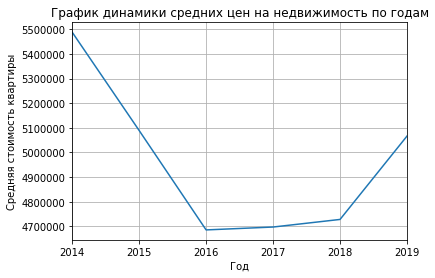

In [818]:
(data
     .groupby('year')['last_price'].agg('mean').astype(int)
     .plot(grid=True, title='График динамики средних цен на недвижимость по годам'))

plt.xlabel('Год', axes=ax)
plt.ylabel('Средняя стоимость квартиры', axes=ax)

Максимальные цены были зафиксированы в 2014 году, затем они пошел резкий спад. По ситуации на 2019 год стоимость снова плавно повышается. Эти колебания можно связать с кризисом 2014 года и падением покупательской способности населения.

Text(0, 0.5, 'Средняя стоимость квартиры')

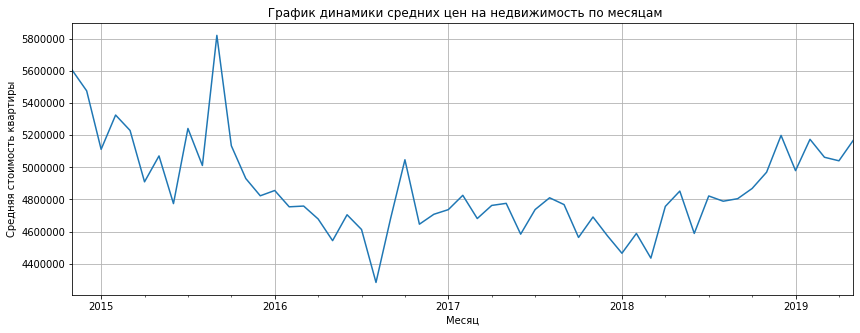

In [819]:
(data
     .groupby('month')['last_price'].agg('mean').astype(int)
     .plot(grid=True, figsize=(14,5), title=' График динамики средних цен на недвижимость по месяцам'))
plt.xlabel('Месяц', axes=ax)
plt.ylabel('Средняя стоимость квартиры', axes=ax)

Несмотря на то, что в 2015 году уже шла общая тенденция на падение уровня цен, именно в 3 квартале 2015 фиксировались сделки по максимальным ценам.
В середине 2016г средняя стоимость квартир была минимальной за 4 года.
Плавный рост средних цен начался в середине 2018 года

Text(0, 0.5, 'Средняя стоимость квартиры')

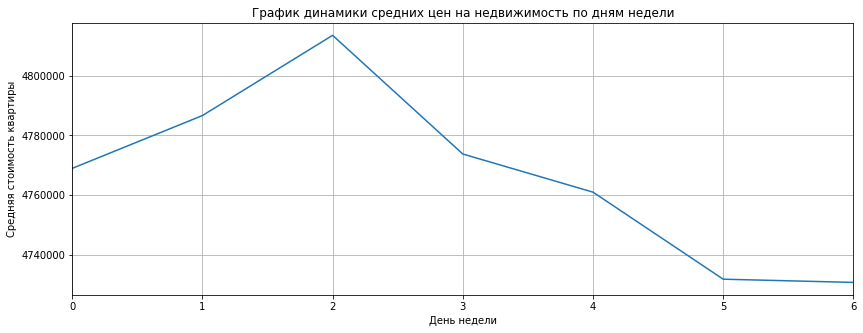

In [820]:
(data
     .groupby('weekday')['last_price'].agg('mean').astype(int)
     .plot(grid=True, figsize=(14,5),title='График динамики средних цен на недвижимость по дням недели'))

plt.xlabel('День недели', axes=ax)
plt.ylabel('Средняя стоимость квартиры', axes=ax)

При рассмотрении средней средней стоимости недвижимости в разрезе дней недели у нас получается логичная картина:
в выходные дни объявлений публикуется очень мало, так же снижена активность в пятницу. 
Объявления о продаже дорогих квартир чаще всего публикуются в среду:)

### 6. Анализ ценообразования в городах с наибольшим числом объявлений.
<a id="6"></a>

В этом разделе рассмотрим более прицельно 10 городов с наибольшим числом объявлений и рассчитаем для каждого в отдельности  среднюю стоимость кв. метра и выделим населенные пункты с самой высокой и самой низкой стоимостью жилья.

In [821]:
top = data['locality_name'].value_counts().head(10).reset_index()
top.columns = ['locality_name', 'sum']
top


,locality_name,sum
0,Санкт-Петербург,13353
1,посёлок Мурино,520
2,посёлок Шушары,437
3,Всеволожск,393
4,Колпино,334
5,Пушкин,332
6,посёлок Парголово,325
7,Гатчина,300
8,деревня Кудрово,298
9,Выборг,225


In [822]:
metr = data.groupby('locality_name')['sq_m_price'].agg('mean')
metr = metr.reset_index()
metr


,locality_name,sq_m_price
0,Бокситогорск,20865.273025
1,Волосово,40410.600376
2,Волхов,35197.775418
3,Всеволожск,67612.881547
4,Выборг,58662.716529
...,...,...
332,село Путилово,40172.955975
333,село Рождествено,37957.875458
334,село Русско-Высоцкое,55090.949895
335,село Старая Ладога,34696.969697


In [823]:
top = top.merge(metr, on='locality_name')
top

,locality_name,sum,sq_m_price
0,Санкт-Петербург,13353,105489.241406
1,посёлок Мурино,520,86355.435702
2,посёлок Шушары,437,79097.673011
3,Всеволожск,393,67612.881547
4,Колпино,334,75555.114644
5,Пушкин,332,100814.570221
6,посёлок Парголово,325,90864.834580
7,Гатчина,300,69341.221504
8,деревня Кудрово,298,92938.190948
9,Выборг,225,58662.716529


In [824]:
top.sort_values(by='sq_m_price', ascending=False)

,locality_name,sum,sq_m_price
0,Санкт-Петербург,13353,105489.241406
5,Пушкин,332,100814.570221
8,деревня Кудрово,298,92938.190948
6,посёлок Парголово,325,90864.834580
1,посёлок Мурино,520,86355.435702
2,посёлок Шушары,437,79097.673011
4,Колпино,334,75555.114644
7,Гатчина,300,69341.221504
3,Всеволожск,393,67612.881547
9,Выборг,225,58662.716529


Ожидаемо самые высокие цены на недвижимость в Санкт-Петербурге и его внутригороском мун.образовании - Пушкине.
Самая низкая стоимость кв.м. жилья в Выборге, который находится в 120 км от Санкт-Петербурга.

### 7. Анализ цен на недвижимость в Санкт-Петербурге
<a id="7"></a>

Рассмотрим подробнее ценообразование в Санкт-Петербурге.
Выделим из нашего датафрейма квартиры, находящиеся в Спб:

In [825]:
spb = data.query('locality_name == "Санкт-Петербург"')
spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,living_koef,sq_m_price,floor_category,kitchen_koef,weekday,month,year,centers_grouped
2,10,5196000,56,2015-08-20,2,2.65,5,34,4,False,...,574,558,0.607143,92785.714286,другой,0.142857,3,2015-08-01,2015,"(12000, 16000]"
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,False,...,48,121,0.320000,100000.000000,другой,0.410000,1,2018-06-01,2018,"(1500, 12000]"
7,5,7915000,71,2019-04-18,2,2.65,24,40,22,False,...,99999,99999,0.563380,111478.873239,другой,0.253521,3,2019-04-01,2019,"(1500, 12000]"
9,18,5400000,61,2017-02-26,3,2.50,9,43,7,False,...,99999,289,0.704918,88524.590164,другой,0.098361,6,2017-02-01,2017,"(12000, 16000]"
10,5,5050000,39,2017-11-16,1,2.67,12,20,3,False,...,553,137,0.512821,129487.179487,другой,0.205128,3,2017-11-01,2017,"(12000, 16000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,6,3200000,39,2017-12-16,1,2.65,9,20,6,False,...,99999,38,0.512821,82051.282051,другой,0.282051,5,2017-12-01,2017,"(16000, 66000]"
23688,19,9200000,101,2019-04-01,3,3.05,15,63,12,False,...,99999,23,0.623762,91089.108911,другой,0.148515,0,2019-04-01,2019,"(12000, 16000]"
23689,13,3550000,35,2018-02-28,1,2.86,15,16,4,False,...,652,29,0.457143,101428.571429,другой,0.257143,2,2018-02-01,2018,"(16000, 66000]"
23690,3,5500000,52,2018-07-19,2,2.65,5,31,2,False,...,99999,15,0.596154,105769.230769,другой,0.115385,3,2018-07-01,2018,"(1500, 12000]"


Округлим расстояние до целых км и посчитаем среднюю цену недвижимости для каждого км удаления от центра Спб:

In [826]:
spb['cityCenters_nearest'] = spb['cityCenters_nearest'].round(-3)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Средняя цена квартиры')

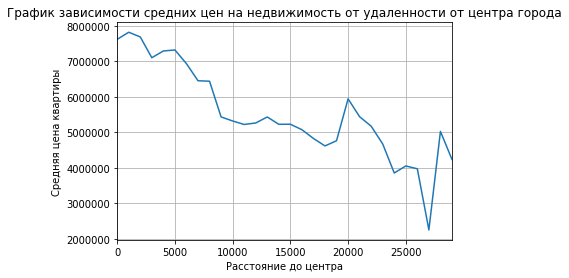

In [827]:
(spb
     .groupby('cityCenters_nearest')['last_price'].agg('mean').astype(int)
     .plot(grid=True, title='График зависимости средних цен на недвижимость от удаленности от центра города'))
plt.xlabel('Расстояние до центра', axes=ax)
plt.ylabel('Средняя цена квартиры', axes=ax)

На графике хорошо видно, что цена на квартиры существенно снижается на удалении 8 км. от центра города. 
Значит центром можно считать значения от 0 до 7 км включительно.
Рассмотрим характеристики квартир в центре Спб:

In [828]:
spb_centre = spb.query('cityCenters_nearest < 8000')
spb_centre

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,living_koef,sq_m_price,floor_category,kitchen_koef,weekday,month,year,centers_grouped
24,8,6500000,97,2015-10-31,2,2.65,3,46,1,False,...,124,265,0.474227,67010.309278,первый,0.195876,5,2015-10-01,2015,"(1500, 12000]"
61,18,7990000,74,2017-08-24,2,2.65,4,43,4,False,...,99999,609,0.581081,107972.972973,последний,0.270270,3,2017-08-01,2017,"(1500, 12000]"
94,3,3500000,29,2019-04-26,1,2.50,5,15,2,False,...,99999,4,0.517241,120689.655172,другой,0.172414,4,2019-04-01,2019,"(1500, 12000]"
99,32,9600000,90,2017-09-26,4,2.65,5,67,2,False,...,99999,104,0.744444,106666.666667,другой,0.088889,1,2017-09-01,2017,"(1500, 12000]"
111,4,4590000,40,2017-05-29,1,2.65,6,18,1,False,...,99999,31,0.450000,114750.000000,первый,0.250000,0,2017-05-01,2017,"(1500, 12000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23664,5,9000000,110,2015-12-10,4,3.36,7,64,5,False,...,118,816,0.581818,81818.181818,другой,0.136364,3,2015-12-01,2015,"(1500, 12000]"
23665,11,4250000,47,2016-05-20,1,2.65,6,18,1,False,...,519,131,0.382979,90425.531915,первый,0.297872,4,2016-05-01,2016,"(1500, 12000]"
23681,13,5250000,43,2018-05-11,2,2.50,5,29,2,False,...,660,80,0.674419,122093.023256,другой,0.139535,4,2018-05-01,2018,"(1500, 12000]"
23690,3,5500000,52,2018-07-19,2,2.65,5,31,2,False,...,99999,15,0.596154,105769.230769,другой,0.115385,3,2018-07-01,2018,"(1500, 12000]"


Изучим параметры квартир и факторы, которые могут оказывать влияние на стоимость недвижимости в центре Спб.

Для начала проанализируем площадь квартир, цену, число комнат и величину потолков.

In [829]:
spb_centre.total_area.describe().astype(int)

count    2094
mean       63
std        20
min        12
25%        47
50%        62
75%        78
max       115
Name: total_area, dtype: int64

In [830]:
spb.total_area.describe().astype(int)

count    13353
mean        53
std         17
min         12
25%         40
50%         50
75%         64
max        115
Name: total_area, dtype: int64

Средняя площадь квартир, выставленных на продажу в центре Спб - 63 кв.м., подавляющее большинство недвижимости (75%) не превышает 78 кв.м. Это примерно на 15% больше аналогичных параметров по городу в целом.

In [831]:
spb_centre.last_price.describe().astype(int)

count        2094
mean      7157179
std       1959636
min       1686000
25%       5700000
50%       7050000
75%       8600000
max      11000000
Name: last_price, dtype: int64

In [832]:
spb.last_price.describe().astype(int)

count       13353
mean      5541422
std       1949119
min       1190000
25%       4010000
50%       5100000
75%       6700000
max      11000000
Name: last_price, dtype: int64

В среднем квартиры в центре Спб стоят 7 млн., а большинство цен не выше 8.6 млн.руб.  
Но можно купить квартиру и за 1,6 млн, и за 11 млн.рублей.

Цены в центре на 30-40% выше средних цен по городу в целом.

In [833]:
spb.rooms.value_counts()

1    4954
2    4684
3    3159
4     509
5      44
6       3
Name: rooms, dtype: int64

Большинство выставленных на продажу квартир - 1-2 комнатные, чуть меньше "трёшек". Квартир большей площади и соответственно с большим числом комнат в разы меньше (что мы уже выяснили, рассмотрев параметр `total_area`)

In [834]:
spb_centre.ceiling_height.describe()

count    2094.000000
mean        2.882287
std         0.324481
min         2.500000
25%         2.650000
50%         2.750000
75%         3.050000
max         5.800000
Name: ceiling_height, dtype: float64

Средняя высота потолков в центре СПб существенно выше СНИПов:) -  2.88 м, но в большинстве своем не выше 3-х метров. Хотя встречаются и предложения с почти 6-метровыми потолками, но это скорее исключения, расположенные в исторических зданиях.

Теперь выясним, какие факторы влияют на стоимость квартир в центре Спб:

In [835]:
spb_centre.groupby('rooms')['last_price'].agg('mean').astype(int)

rooms
1    5742095
2    6995427
3    7942187
4    8564329
5    9286666
6    9800000
Name: last_price, dtype: int64

Количество комнат ожидаемо имеет прямую корреляцию с ценой квартиры, больше комнат - больше площадь - выше цена.

Правда средняя стоимость в центре существенно отличается от всей Лен.области в целом: однушка стоит уже не 3.7 млн, а 5.7млн. рублей. Двушки в центре обойдутся в среднем почти в 7 млн., против 5 млн. по всей области. Цены на остальные категории квартир так же выше средних по области на 30-40%.

In [836]:
spb.groupby('rooms')['last_price'].agg('mean').astype(int)

rooms
1    4312633
2    5865873
3    6670854
4    7241147
5    8377954
6    8821333
Name: last_price, dtype: int64

От средних цен по городу стоимость квартир в центре так же заметно отличается в бОльшую сторону, стоимость всех категорий квартир на 20-25% выше именно в центре.

Теперь посмотри зависит ли цена квартиры от этажа в целом по городу и по центру Спб:

In [837]:
spb_centre.groupby('floor_category')['last_price'].agg('mean').astype(int)

floor_category
другой       7334578
первый       6235331
последний    7242424
Name: last_price, dtype: int64

In [838]:
spb.groupby('floor_category')['last_price'].agg('mean').astype(int)

floor_category
другой       5617263
первый       5035153
последний    5515969
Name: last_price, dtype: int64

Цены на первых этажах заметно ниже других, и даже последних этажей. Эта тенденция сохраняется и по области, и по городу, и в самом центре Спб. Верхние этажи так же немного проигрывают по цене середине дома.

Посмотрим наглядно на графике зависимость цен на недвижимость от удаленности от центра:

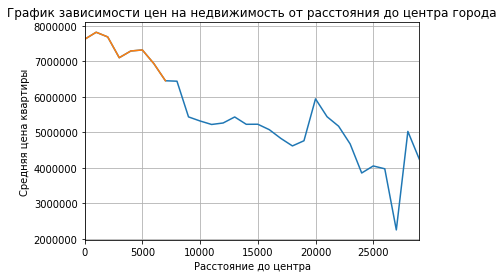

In [839]:
(spb
     .groupby('cityCenters_nearest')['last_price'].agg('mean').astype(int)
     .plot(grid=True, title='График зависимости цен на недвижимость от расстояния до центра города'))

plt.xlabel('Расстояние до центра', axes=ax)
plt.ylabel('Средняя цена квартиры', axes=ax)
(spb_centre
             .groupby('cityCenters_nearest')['last_price'].agg('mean').astype(int)
             .plot(grid=True))
plt.xlabel('Расстояние до центра', axes=ax)
plt.show()

Как мы уже выясняли ранее, в целом по городу стоимость резко снижается на расстоянии 8 км от центра.
В самом центре тоже есть тенденция резкого падения цен, как только расстояние достигает 3 км.

Теперь выясним, как дата размещения объявлений влияла на стоимости квартир в центре СПб и по всему городу.
Удобнее всего сравнить это на общем графике:

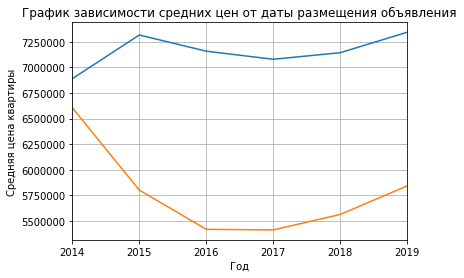

In [840]:
(spb_centre
         .groupby('year')['last_price']
         .agg('mean')
         .plot(grid=True, title='График зависимости средних цен от даты размещения объявления'))
plt.xlabel('Год', axes=ax)
plt.ylabel('Средняя цена квартиры', axes=ax)
plt.show
spb.groupby('year')['last_price'].agg('mean').plot(grid=True)
plt.xlabel('Год', axes=ax)
plt.show()

Очевидно, что стоимость квартир в центре СПБ на протяжении последних 5 лет остается стабильнов высокой и мало подвержена изменениям. Пик средних цен приходится на 2015 год.

На средние цены по всему Спб явно влияют внешние экономические факторы. 
Например, экономический кризис, который начал набирать обороты в 2014 году и на графиках по городу (и области) он отразился резким падение цен на недвижимость.

Пояснить такое различие в ценообразовании  можно тем, что квартиры в центре города всегда считаются более привлекательным вложением инвестиций. Поэтому в 2015 году на фоне обвала курса рубля и общего резкого падения цен на недвижимость по Лен.области, покупатели предпочитали вкладывать средства в стабильно востребованный сегмент недвижимости.

### 8. ОБЩИЕ ВЫВОДЫ ПО ПРОЕКТУ
<a id="8"></a>

В данном проекте мы изучили архив объявлений сервиса Яндекс.Недвижимость о продаже квартир в Ленинградской области за несколько лет.

* На первом этапе провели предобработку данных: 
    - многие столбцы содержали пропуски данных, и для каждого параметра нами был подобран способ заполнения недостающих значений. Больше всего пропусков (до 40% в одном столбце) было допущено в параметрах, которые автоматически рассчитываются для каждого объявления: расстояния до ближайших объектов инфраструктуры (парков, прудов, аэропорта). 
    - По данному вопросу можно рекомендовать разработчикам сервиса провести отладку алгоритма определения заданных расстояний. 
    - в пунктах, заполняемых клиентами сервиса, так же встречались пропуски. Это можно объяснить некорректными формулировками анкет и внести предложение о пересмотре некоторых формулировок вопросов. В частности устранить открытые вопросы, при наличии таковых в анкете и заменить их конкретными вариантами ответа. 
    - В некоторых случаях пропуски могли быть обусловлены ошибками при переносе значений в базу данных. По этому поводу стоит провести работу среди персонала, занимающегося непосредственным заполнением электронной базы данных сервиса.


* Следующим шагом мы провели расчет дополнительных параметров, таких как стоимость кв.м. недвижимости, которые помогли нам в дальнейшейм анализе ценообразования.


* Затем нами были изучены основные параметры жилья. Этот этап потребовал избавления и от выборосов в данных, которые встречались по многим параметрам. 
    Причиной наличия выбросов могли стать во-первых ошибки заполнения базы, в результате которых некоторые значения были на порядок увеличены или уменьшены. Во-вторых, сочетание исторической застройки в центре Санкт-Петербурга, типовых домов по всей Лен.области, а так же современные дома премиум-класса с нестандартными планировками составляют достаточно неоднородный по своим параметрам рынок недвижимости. Однако, невысокий процент нетипового жилья позволил исключить подобные объекты недвижимости из нашей базы данных без потери качества исследования.
    

* Следующим этапом мы рассмотрели факторы, которые могут оказывать влияние на процесс ценообразования. 
    Нами была выявлена прямая корреляция между стоимостью квартиры и ее площадью (включая количество комнат), расположением квартиры относительно центра города (и внутри строения). Так было обнаружено влияние внешних экономических факторов (экономическая ситуация в стране, колебания курсов валют) на средние стоимости жилья по всей Лен.области на протяжении исследуемого периода времени.
    

* Затем мы более отдельно рассмотрели города с наибольшим числом объявлений, и наиболее подробно ситуацию с ценообразованием в Санкт-Петербурге. Здесь мы получили ожидаемые результаты: прямая корреляция между стоимостью жилья и его близостью к культурной столице. На ценообразование в Санкт-Петербурге оказывают влияние те же параметры, что и на всю недвижимость в Ленинградской области. Однако стоимость квартир в этом городе на 30-40% выше средних цен по области.
    Внутри самого Санкт-Петербурга замечена интересная тенденция: стоимость квартир в самом центре города не подвержена влиянию экономических факторов. В период общего экономического спада и падения средних цен на жилье по всей области квартиры в центре города рассматриваются покупателями как удачные инвестиции и их стоимость в течение всего периода наблюдения оставалась на стабильно высоком уровне (выше средних цен по всему городу).


Таким образом в результате исследования рынка недвижимости мы выявили основные тенденции ценообразования и факторы на него влияющие. Эту информацию и изложенные выше предложения рекомендовано будет учесть при построении автоматизированной системы определения рыночной стоимости объекта недвижимости.









